In [2]:
 
import random
import numpy as np
import torch

#seed = 12314
#random.seed(seed)
#np.random.seed(seed)
#torch.manual_seed(seed)
#torch.cuda.manual_seed_all(seed)

# Parameters
n, p = 50, 40  # Dimensions of the matrix
noise_std = 0.1  # Standard deviation of the homoscedastic noise

# Generate two random vectors
u = np.random.rand(n)  # Vector of length n
v = np.random.rand(p)  # Vector of length p

# Create a rank-1 matrix as the outer product of u and v
rank_1_matrix = np.outer(u, v)

# Add homoscedastic Gaussian noise (constant variance across the matrix)
noise = np.random.normal(0, noise_std, size=(n, p))
noisy_matrix = rank_1_matrix + noise
 
# Print the original and noisy matrix
print("Rank-1 Matrix (Outer Product):")
print(rank_1_matrix)
print("\nNoisy Matrix (with Homoscedastic Noise):")
print(noisy_matrix)


Rank-1 Matrix (Outer Product):
[[0.01447376 0.05550373 0.00844321 ... 0.01242699 0.05296095 0.02847481]
 [0.18372676 0.70455246 0.10717632 ... 0.15774553 0.67227498 0.36145313]
 [0.21719687 0.83290312 0.12670098 ... 0.18648256 0.79474554 0.42730025]
 ...
 [0.19978358 0.76612689 0.116543   ... 0.17153172 0.73102852 0.39304237]
 [0.12202122 0.46792504 0.07118062 ... 0.10476592 0.44648811 0.24005732]
 [0.19779516 0.75850171 0.11538306 ... 0.16982448 0.72375267 0.38913046]]

Noisy Matrix (with Homoscedastic Noise):
[[ 0.00179781  0.07102738  0.06509598 ...  0.16399429  0.05875082
  -0.01945987]
 [ 0.24339981  0.77012749  0.18832242 ...  0.0504205   0.61231485
   0.25322319]
 [ 0.17622397  0.99559543  0.09348237 ...  0.21444563  0.87770261
   0.44718891]
 ...
 [ 0.26353759  0.76975248  0.13820909 ...  0.32179577  0.70021277
   0.31954374]
 [ 0.12282725  0.24051731  0.09009115 ...  0.09376791  0.36508376
   0.14919225]
 [ 0.17364256  0.82126374 -0.05522327 ... -0.01250494  0.62074988
   0.44

In [3]:
import sys
import os
import matplotlib.pyplot as plt

# Add the path to utils.py
sys.path.append(r"C:\Document\Serieux\Travail\python_work\cEBNM_torch\py")
sys.path.append(r"C:\Document\Serieux\Travail\python_work\cEBNM_torch\py\ebnm_solver")
sys.path.append(r"C:\Document\Serieux\Travail\python_work\cEBNM_torch\py\numerical_routine")
from cEBMF import *

In [4]:
mycebmf= cEBMF(data= noisy_matrix)
K=5
# Perform udv_si transformation
U, s, Vt = np.linalg.svd(noisy_matrix, full_matrices=False)

 
mycebmf

In [5]:
type(mycebmf)

cEBMF.cEBMF_object

In [6]:
K = np.min([K, U.shape[1]])
print(K)

5


In [7]:
mycebmf.init_LF()
print(mycebmf.L[:,1])
print(mycebmf.F[:,1])


[-0.20857911  0.14911094  0.4907518  -0.05116357  0.303075   -0.25020772
  0.34568197 -0.23049185  0.2857822  -0.06433202 -0.04776776 -0.04202024
 -0.19929406 -0.18405238  0.3075832  -0.22670805 -0.45020413 -0.10839093
  0.11641326 -0.04931295 -0.1875838   0.06772301 -0.03368699 -0.09111977
 -0.04177937  0.24544959 -0.07009827  0.09135786 -0.44724777  0.15131862
  0.02555166 -0.09317695 -0.1833449  -0.1829802  -0.14721315  0.10438888
 -0.07255308  0.22940506  0.16364074  0.11117291  0.10319264 -0.00322072
  0.06586942 -0.15176594 -0.02648683 -0.08740864  0.00224437 -0.10432808
  0.10938343  0.240677  ]
[-1.75564468e-01  2.65406549e-01  2.42763627e-02 -6.21063747e-02
 -1.30605519e-01 -4.86076921e-02 -4.51544225e-02 -1.68346778e-01
  2.55260497e-01  2.98048109e-01 -9.29848466e-05 -1.44632354e-01
  5.72636398e-03  3.16358060e-02 -6.05350658e-02  5.54237142e-03
 -1.15832210e-01 -2.80250102e-01 -1.68536574e-01 -3.94288391e-01
  9.41944644e-02  4.87129167e-02 -2.05965355e-01  6.02836348e-03


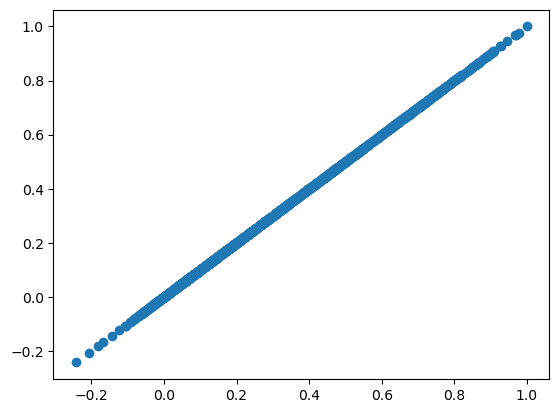

In [8]:
mycebmf.update_fitted_val()
U_k = U[:, :K]
D_k = np.diag(s[:K])
V_k = Vt[:K, :]
L = np.matmul(U_k,  D_k)
F =V_k.T
 
plt.scatter(mycebmf.Y_fit , np.sum( [np.outer(    L[:, k]  ,   F[:, k]    ) for k in range(  K)], axis=0) )

check partial residual is good, seems fine

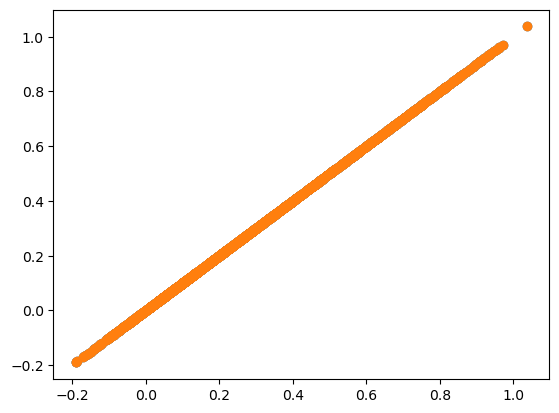

In [9]:
mycebmf.cal_partial_residuals(k=0)
mycebmf.update_fitted_val()
idx_loop = set(range(5))-{0}
Rk= noisy_matrix-np.sum( [np.outer(  mycebmf.L[:, j]  ,  mycebmf.F[:, j]    ) for j in  idx_loop], axis=0)
plt.scatter (mycebmf.Rk, Rk)
plt.scatter( mycebmf.Rk, 
            noisy_matrix- np.sum( [np.outer(    L[:, k]  ,   F[:, k]    ) for k in set(range(  K))-{0}], axis=0)
            )

check if update works

In [10]:
mycebmf.update_tau()
mycebmf.tau

array([[150.56145, 150.56145, 150.56145, ..., 150.56145, 150.56145,
        150.56145],
       [150.56145, 150.56145, 150.56145, ..., 150.56145, 150.56145,
        150.56145],
       [150.56145, 150.56145, 150.56145, ..., 150.56145, 150.56145,
        150.56145],
       ...,
       [150.56145, 150.56145, 150.56145, ..., 150.56145, 150.56145,
        150.56145],
       [150.56145, 150.56145, 150.56145, ..., 150.56145, 150.56145,
        150.56145],
       [150.56145, 150.56145, 150.56145, ..., 150.56145, 150.56145,
        150.56145]], dtype=float32)

In [11]:
mycebmf.prior_F

<function cEBMF.prior_norm(X, betahat, sebetahat, model_param)>

In [12]:
print(mycebmf.prior_F
      )

mycebmf.update_loading_factor_k(k=0)

<function prior_norm at 0x000002EDA76BF5B0>


In [13]:
k=0

mycebmf.cal_partial_residuals(k=k)
compute_hat_l_and_s_l(Z = mycebmf.Rk,
                                                            nu = mycebmf.F[:,k] ,
                                                            omega= mycebmf.F2[:,k], 
                                                            tau= mycebmf.tau  )
compute_hat_f_and_s_f(Z = mycebmf.Rk,
                                                            nu = mycebmf.L[:,k] ,
                                                            omega= mycebmf.L2[:,k], 
                                                            tau= mycebmf.tau  )
 

(array([-0.397333  , -1.4334211 , -0.127941  , -0.41318676, -0.64691365,
        -0.11250316, -1.2980577 , -0.37313905, -1.423094  , -1.1167827 ,
        -0.465516  , -0.24422976, -0.8165252 , -0.66315407, -0.99274254,
        -0.16126847, -1.2402989 , -0.22498809, -1.4043989 , -0.60268605,
        -0.559117  , -0.33476797, -0.31445035, -1.3218093 , -1.1083101 ,
        -1.1166257 , -1.4277955 , -1.3757353 , -0.09796076, -1.0519    ,
        -0.5008094 , -0.3169421 , -0.76547456, -0.6596071 , -0.83697015,
        -0.90777063, -0.26334757, -0.30632713, -1.3770304 , -0.74280006],
       dtype=float32),
 array([0.02781355, 0.02781355, 0.02781355, 0.02781355, 0.02781355,
        0.02781355, 0.02781355, 0.02781355, 0.02781355, 0.02781355,
        0.02781355, 0.02781355, 0.02781355, 0.02781355, 0.02781355,
        0.02781355, 0.02781355, 0.02781355, 0.02781355, 0.02781355,
        0.02781355, 0.02781355, 0.02781355, 0.02781355, 0.02781355,
        0.02781355, 0.02781355, 0.02781355, 0.027813

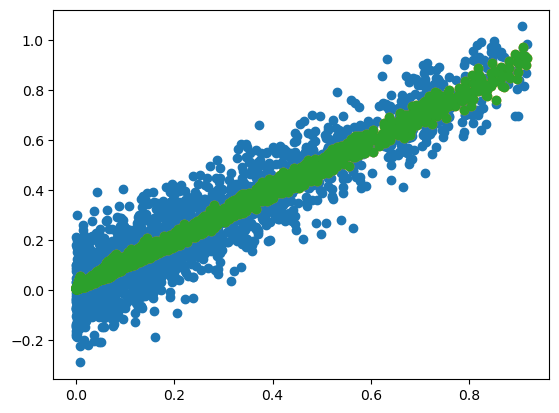

In [14]:
mycebmf.iter()
mycebmf.update_fitted_val()
plt.scatter(mycebmf.Y_fit, noisy_matrix)
 
plt.scatter(mycebmf.Y_fit, rank_1_matrix)
plt.scatter(np.outer(mycebmf.L[:,0],mycebmf.F[:,0] ), rank_1_matrix)


In [15]:
np.sqrt(np.mean(mycebmf.Y_fit- rank_1_matrix)**2)
          

0.004167286060016388

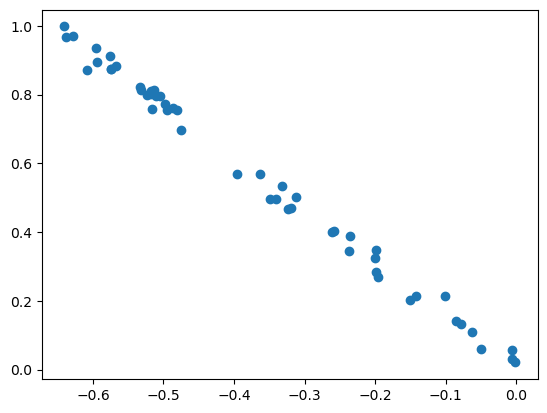

In [16]:
plt.scatter(mycebmf.L[:,0], u)

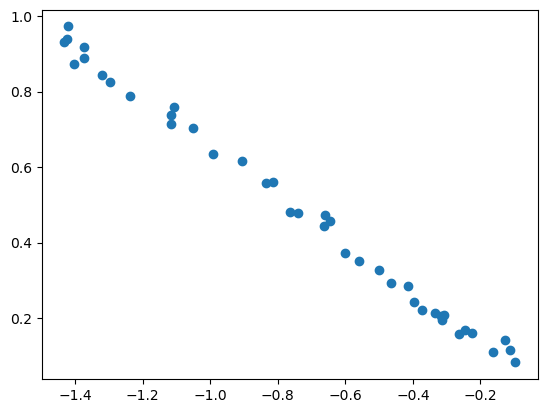

In [17]:
plt.scatter(mycebmf.F[:,0], v)

In [18]:
mycebmf.L[:,1]

array([-9.85083570e-09,  6.23953511e-09,  9.42888505e-08, -1.93034144e-09,
        1.92780814e-08, -1.32489832e-08,  2.64556999e-08, -1.15287389e-08,
        1.70275136e-08, -2.44979281e-09, -1.79914006e-09, -1.58256852e-09,
       -9.21493459e-09, -8.22695689e-09,  1.99093737e-08, -1.12136567e-08,
       -6.38468478e-08, -4.29335145e-09,  4.64996619e-09, -1.86402804e-09,
       -8.44978487e-09,  2.58056199e-09, -1.26291755e-09, -3.54619778e-09,
       -1.57352043e-09,  1.27917001e-08, -2.68057954e-09,  3.55002649e-09,
       -6.21255509e-08,  6.35775299e-09,  9.51690171e-10, -3.63411679e-09,
       -8.18443269e-09, -8.16017831e-09, -6.14898621e-09,  4.10966905e-09,
       -2.77839818e-09,  1.14187895e-08,  7.02123382e-09,  4.40810988e-09,
        4.05857614e-09, -1.22013150e-10,  2.50250864e-09, -6.39009778e-09,
       -9.92214422e-10, -3.38990946e-09,  8.30318939e-11, -4.11538137e-09,
        4.33117320e-09,  1.23683899e-08], dtype=float32)

In [19]:
for i in range(40):
    mycebmf.iter()

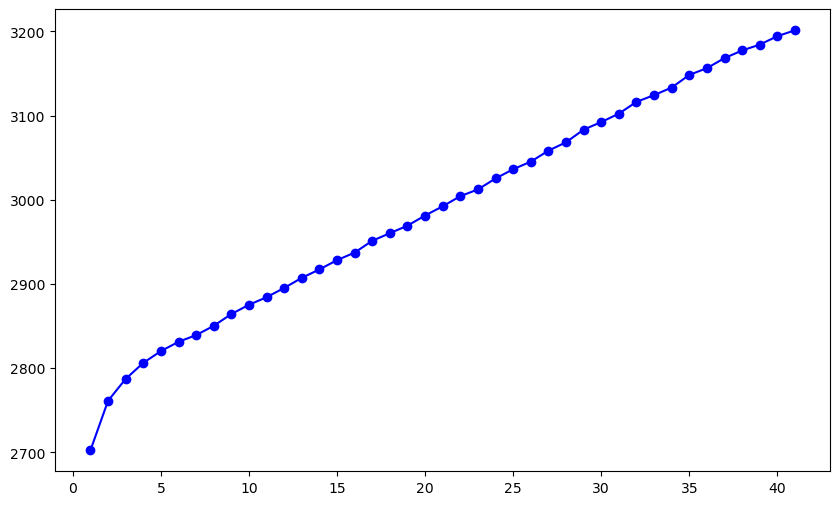

In [20]:
plt.figure(figsize=(10, 6))
plt.plot(np.array(mycebmf.obj) , marker='o', linestyle='-', color='b')

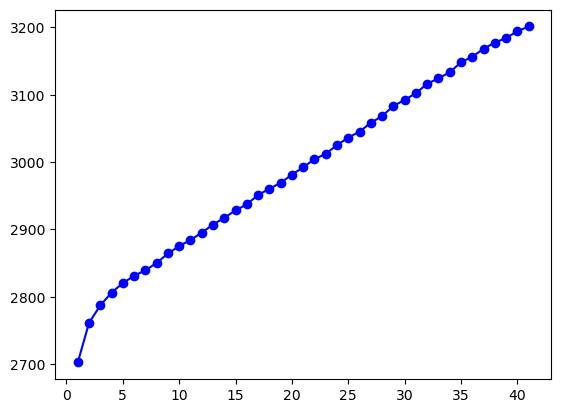

In [21]:
plt.plot(np.array(mycebmf.obj) , marker='o', linestyle='-', color='b')

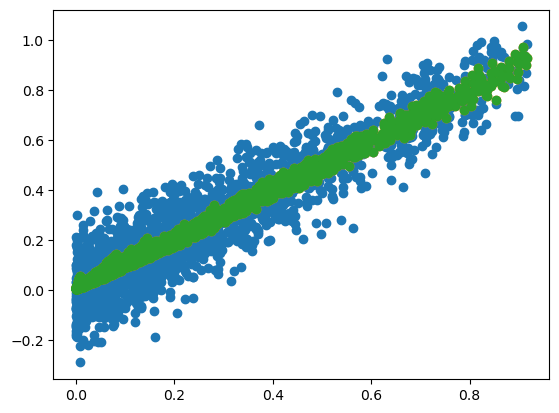

In [22]:
plt.scatter(mycebmf.Y_fit, noisy_matrix)
 
plt.scatter(mycebmf.Y_fit, rank_1_matrix) 
plt.scatter(np.outer(mycebmf.L[:,0],mycebmf.F[:,0] ), rank_1_matrix)

In [23]:
np.sqrt(np.mean(mycebmf.Y_fit- rank_1_matrix)**2)
 

0.004611798354505347

In [ ]:

results = []

for i in range(100):
    # Parameters
    n, p = 50, 40  # Dimensions of the matrix
    noise_std = 0.1  # Standard deviation of the homoscedastic noise

# Generate two random vectors
    u = np.random.rand(n)  # Vector of length n
    v = np.random.rand(p)  # Vector of length p

# Create a rank-1 matrix as the outer product of u and v
    rank_1_matrix = np.outer(u, v)
 
# Add homoscedastic Gaussian noise (constant variance across the matrix)
    noise = np.random.normal(0, noise_std, size=(n, p))
    noisy_matrix = rank_1_matrix + noise
    mycebmf= cEBMF(data= noisy_matrix)
    mycebmf.init_LF()
    for j in range(40):
        mycebmf.iter()

        rr = np.sqrt(np.mean(mycebmf.Y_fit- rank_1_matrix)**2)
            
        results.append( rr)
 

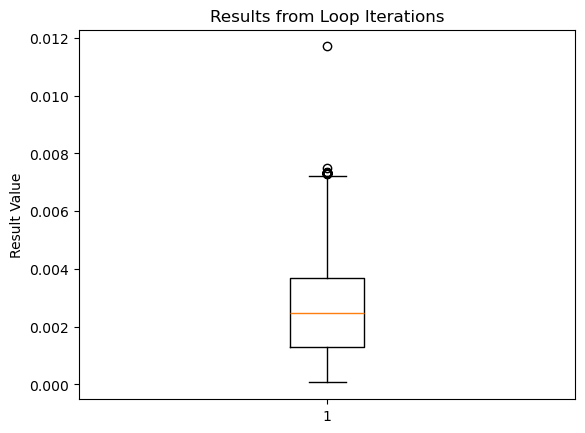

In [27]:
plt.boxplot(results)
plt.title("Results from Loop Iterations")
plt.ylabel("Result Value")
plt.show()

In [30]:
res= np.asarray(results)

In [35]:
np.quantile(res,q=0.75)

0.0036871519634758556